## Decision Tree

## 1. Data Preparation:
##  Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

In [2]:
# loading the data
df=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')
df.shape

(908, 13)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


## 2. Exploratory Data Analysis (EDA):
- Perform exploratory data analysis to understand the structure of the dataset.
- Check for missing values, outliers, and inconsistencies in the data.
- Visualize the distribution of features, including histograms, box plots, and correlation matrices.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
# checking for null values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [6]:
# replacing the null value with median
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [7]:
# checking for duplicate values
df.duplicated().sum()

np.int64(1)

In [8]:
# droping duplicates
df.drop_duplicates(inplace=True,ignore_index=True)


In [9]:
df.duplicated().sum()

np.int64(0)

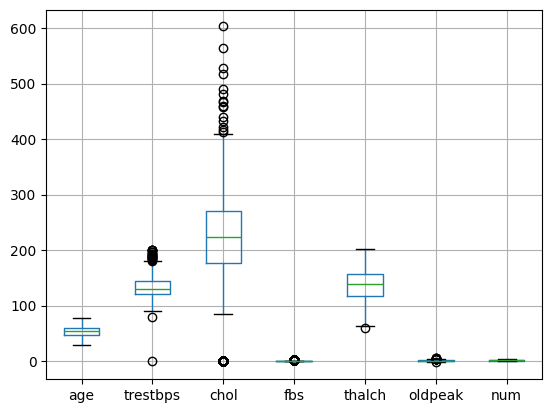

In [10]:
## box plot to detect outliers

df.boxplot()
plt.show()

In [11]:
#removing outliers

def outlier_cappin(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extrem=Q1-1.5*IQR
    upper_extrem=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_extrem if x<lower_extrem else upper_extrem if x>upper_extrem else x)


for col in df.select_dtypes(['int','float']).columns:
    outlier_cappin(df,col)

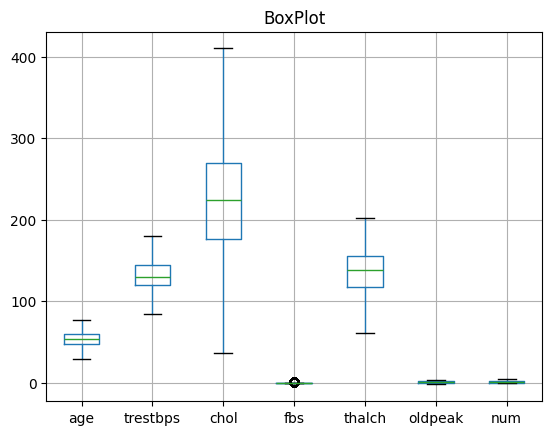

In [12]:
## box plot after removing outliers

df.boxplot()
plt.title('BoxPlot')
plt.show()

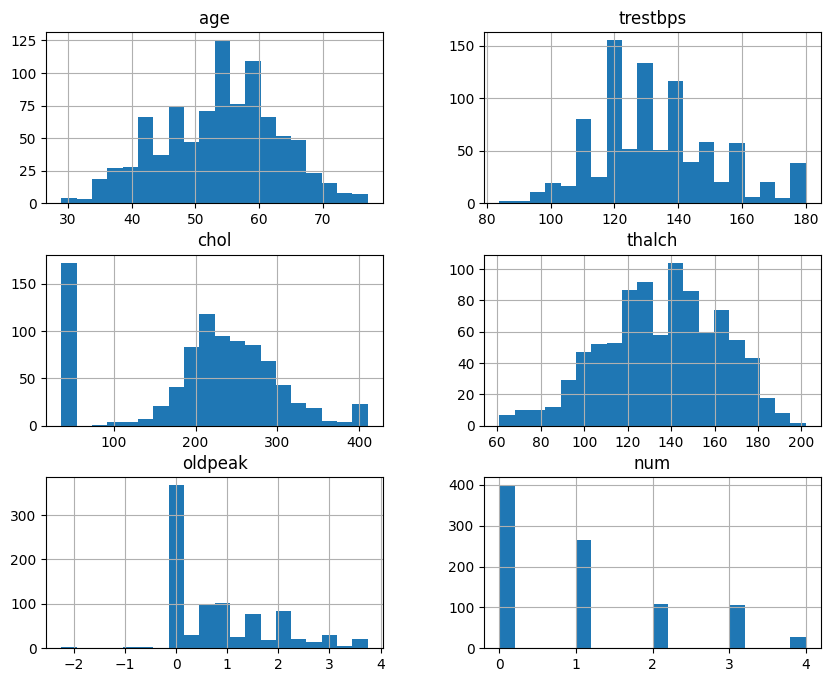

In [13]:
df.hist(bins=20,figsize=(10,8))
plt.show()

## 3. Feature Engineering:

##  If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [14]:
# converting boolean into int
df['fbs'] = df['fbs'].astype(int)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145.0,233.00,1,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135.0,203.00,0,normal,132.0,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140.0,192.00,0,normal,148.0,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118.0,186.00,0,lv hypertrophy,190.0,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110.0,201.00,0,normal,126.0,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,Male,asymptomatic,125.0,36.25,0,normal,120.0,False,1.5,upsloping,normal,4
903,62,Male,asymptomatic,166.0,170.00,0,st-t abnormality,120.0,True,3.0,flat,reversable defect,4
904,56,Male,non-anginal,170.0,36.25,0,lv hypertrophy,123.0,True,2.5,downsloping,reversable defect,4
905,56,Male,non-anginal,144.0,208.00,1,st-t abnormality,105.0,TURE,0.5,downsloping,reversable defect,4


In [15]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype(str)

In [16]:
df.dtypes

age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs           int64
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [17]:

from sklearn.preprocessing import LabelEncoder

# converting categorical columns into numerical columns
categorical_val=df.select_dtypes(include='object').columns
label=LabelEncoder()
for col in categorical_val:
    df[col]=label.fit_transform(df[col])

df.rename(columns={'num':'target'},inplace=True)


In [18]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145.0,233.00,1,0,150.0,1,2.3,0,0,0
1,41,1,1,135.0,203.00,0,1,132.0,1,0.0,1,0,0
2,57,1,0,140.0,192.00,0,1,148.0,1,0.4,1,0,0
3,52,1,3,118.0,186.00,0,0,190.0,1,0.0,1,0,0
4,57,1,0,110.0,201.00,0,1,126.0,3,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,1,0,125.0,36.25,0,1,120.0,1,1.5,2,1,4
903,62,1,0,166.0,170.00,0,2,120.0,3,3.0,1,2,4
904,56,1,2,170.0,36.25,0,0,123.0,3,2.5,0,2,4
905,56,1,2,144.0,208.00,1,2,105.0,2,0.5,0,2,4


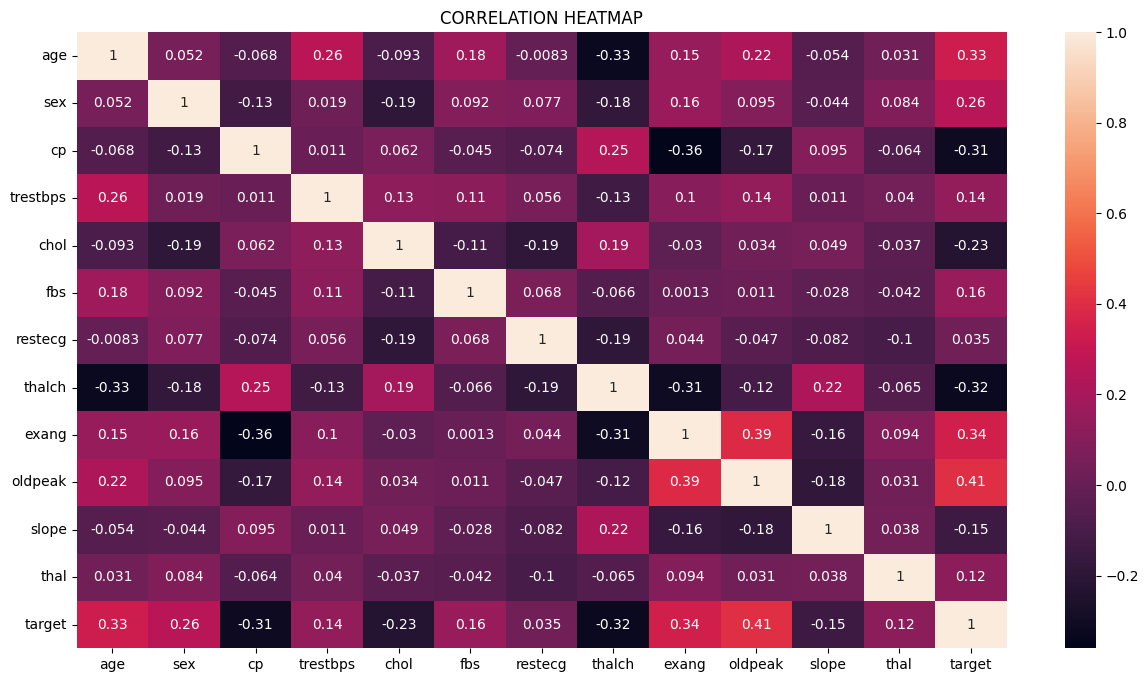

In [19]:
## ploting heatmap to show correlation
corr=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)
plt.title('CORRELATION HEATMAP')
plt.show()

## 4. Decision Tree Classification:
- Split the dataset into training and testing sets (e.g., using an 80-20 split).
- Implement a Decision Tree Classification model using a library like scikit-learn.
- Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics 
  (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [21]:
#defining features and target
features=df.drop('target',axis=1)
target=df['target']
print(features.head())
print(target.head())

   age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   3     145.0  233.0    1        0   150.0      1      2.3      0   
1   41    1   1     135.0  203.0    0        1   132.0      1      0.0      1   
2   57    1   0     140.0  192.0    0        1   148.0      1      0.4      1   
3   52    1   3     118.0  186.0    0        0   190.0      1      0.0      1   
4   57    1   0     110.0  201.0    0        1   126.0      3      1.5      1   

   thal  
0     0  
1     0  
2     0  
3     0  
4     0  
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [22]:
#splitting the data using train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=25)
print(x_train.head())
print(x_test.head())
print(y_train.head())
print(y_test.head())

     age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  \
718   61    1   0     148.0  203.0    0        1   161.0      1      0.0   
268   38    0   1     120.0  275.0    1        1   129.0      1      0.0   
372   37    0   0     130.0  173.0    0        2   184.0      1      0.0   
378   50    1   0     150.0  215.0    0        1   140.0      3      0.0   
761   55    1   0     116.0  186.0    1        2   102.0      1      0.0   

     slope  thal  
718      2     2  
268      1     0  
372      2     1  
378      2     1  
761      1     2  
     age  sex  cp  trestbps    chol  fbs  restecg  thalch  exang  oldpeak  \
795   62    1   0     150.0   36.25    1        2    78.0      1      2.0   
194   64    1   0     130.0  223.00    0        2   128.0      1      0.5   
444   55    1   0     120.0  226.00    0        0   127.0      3      1.7   
92    58    1   2     140.0  211.00    1        0   165.0      1      0.0   
673   58    0   0     170.0  225.00    1    

In [23]:
# training the model using Decisiontree classifier
d_model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
d_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [24]:
# prediction for x_test
y_pred=d_model.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0])

In [25]:
# printing classification-report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.66      0.79      0.72        81
           1       0.32      0.68      0.44        40
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00         9

    accuracy                           0.50       182
   macro avg       0.20      0.29      0.23       182
weighted avg       0.36      0.50      0.42       182



## 5. Hyperparameter Tuning:
- Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [26]:
from sklearn.model_selection import GridSearchCV

params={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7],'splitter':['random','best']}


In [27]:
grid=GridSearchCV(d_model,params)
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'splitter': ['random', 'best']})

In [28]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

In [29]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3,splitter='random')

In [30]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [31]:
y_pred1=model.predict(x_test)

In [32]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        81
           1       0.33      0.60      0.42        40
           2       0.33      0.07      0.12        27
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00         9

    accuracy                           0.52       182
   macro avg       0.27      0.31      0.26       182
weighted avg       0.42      0.52      0.45       182



## Task-6. Model Evaluation and Analysis:
- Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
- Visualize the decision tree structure to understand the rules learned by the model and identify important features

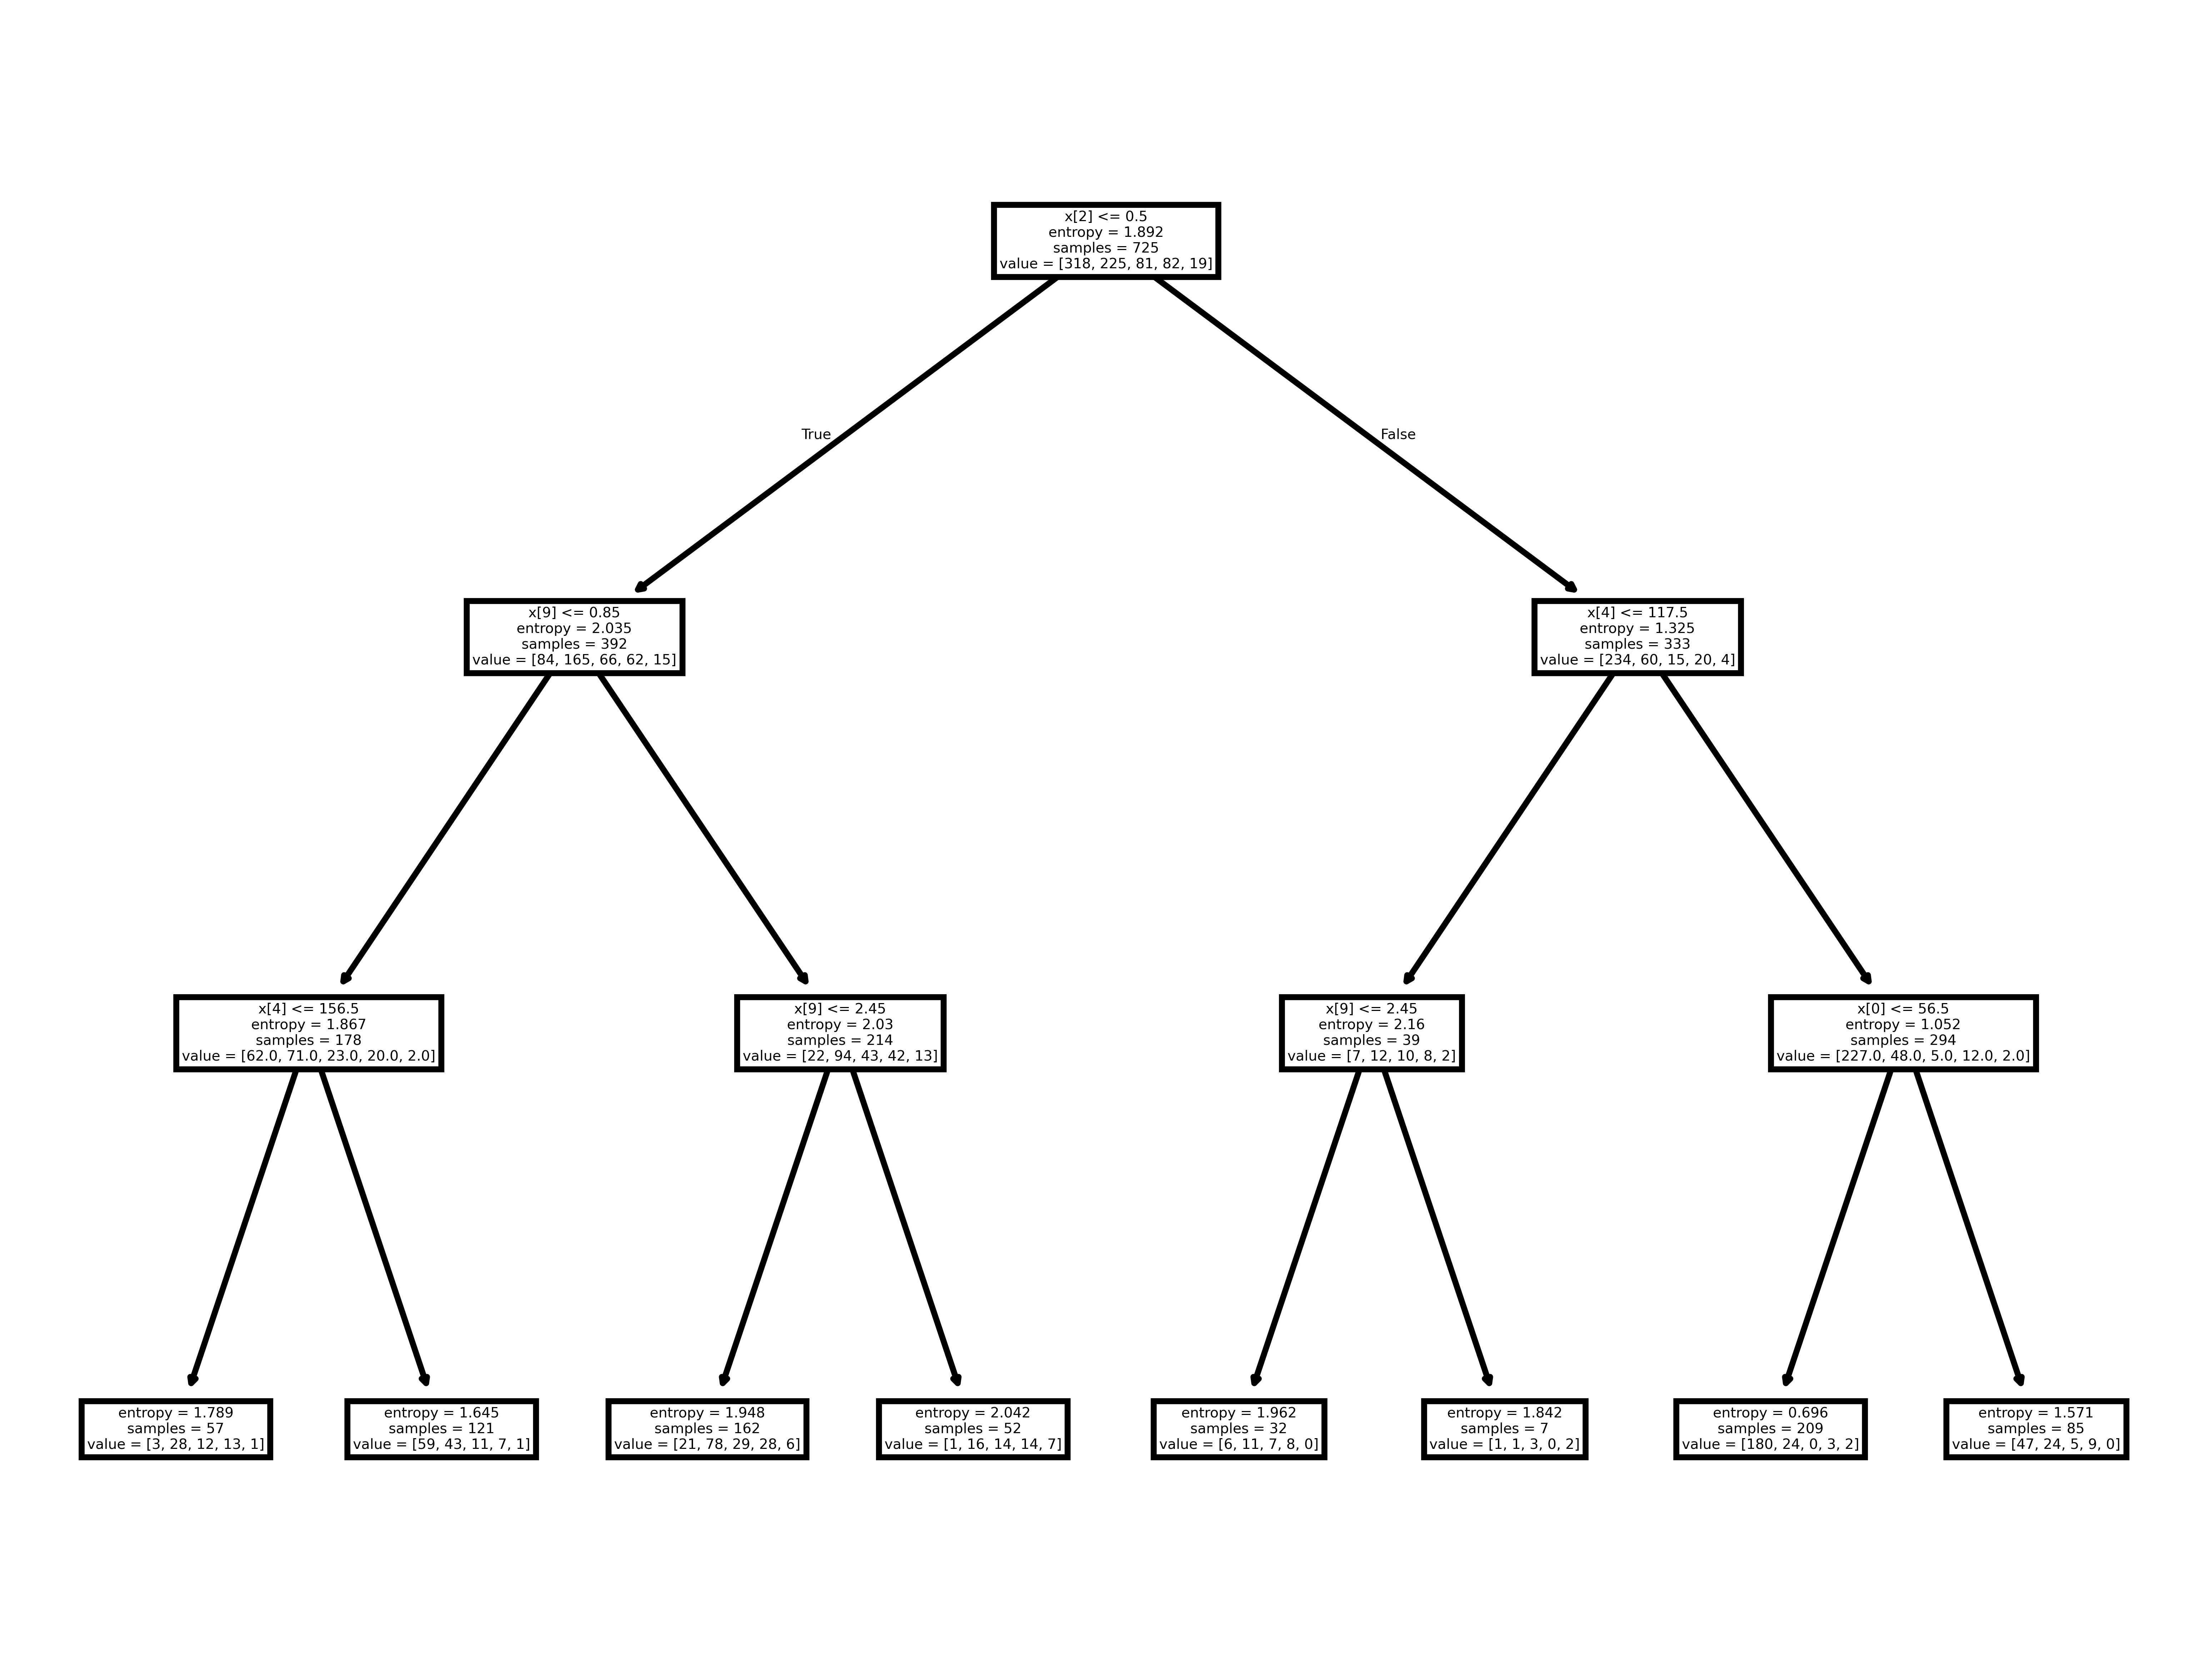

In [33]:
plt.figure(dpi=1200)
tree.plot_tree(d_model)
plt.show()

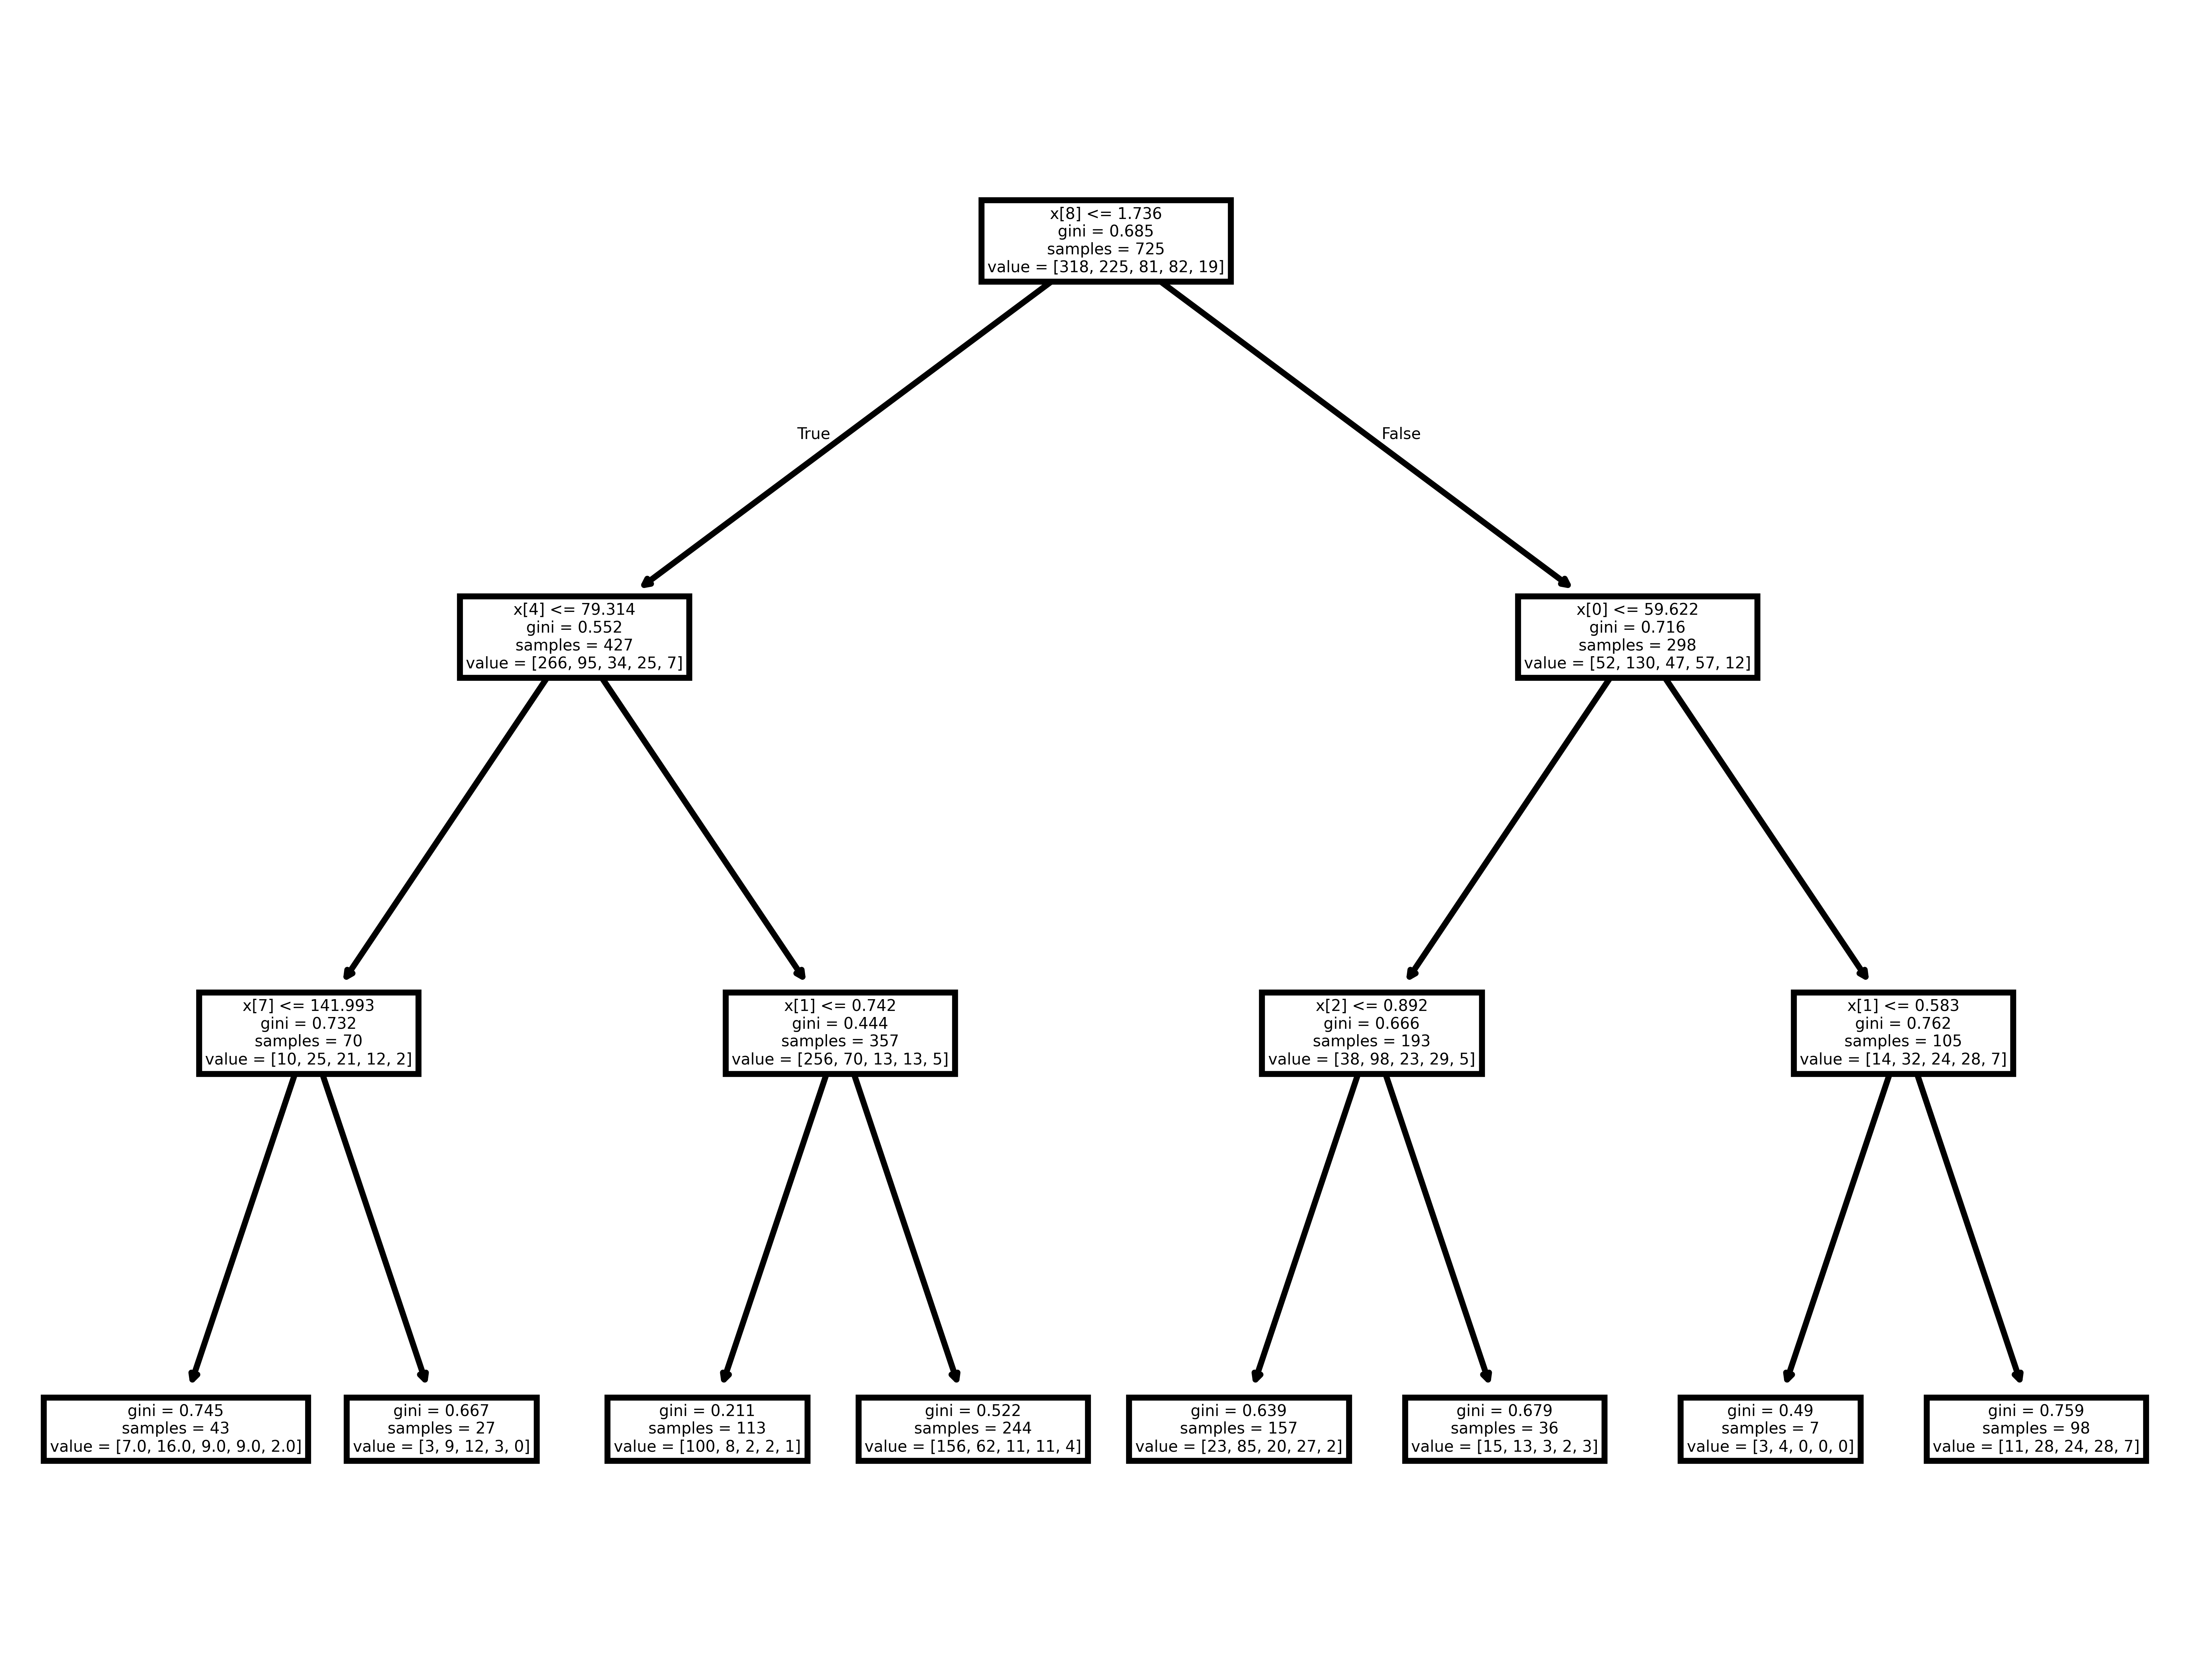

In [34]:
plt.figure(dpi=1200)
tree.plot_tree(model)
plt.show()

## Interview Questions:

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

In [35]:
# max_depth: Limits tree depth; prevents overfitting by restricting complexity. 
# min_samples_split: Minimum samples to split a node; higher values prevent small splits, reducing overfitting. 
# min_samples_leaf: Minimum samples per leaf; larger leaves reduce overfitting.
# criterion: Split quality metric (e.g., gini, entropy); affects purity of nodes.
# max_features: Limits features considered per split; helps prevent overfitting and speeds up training.

## 2. What is the difference between the Label encoding and One-hot encoding?

In [36]:
# Label Encoding: Assigns each category a unique integer and Best for ordinal data with an inherent order.
# One-Hot Encoding: Creates binary columns for each category, suited for nominal (unordered) data.

